<a href="https://colab.research.google.com/github/ponrajj1234/Employees_performance_and_productive/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMS Spam Detection**

## 📘 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 📂 2. Load Dataset

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 📊 3. Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: title={'center': 'Spam vs Ham'}, xlabel='label'>

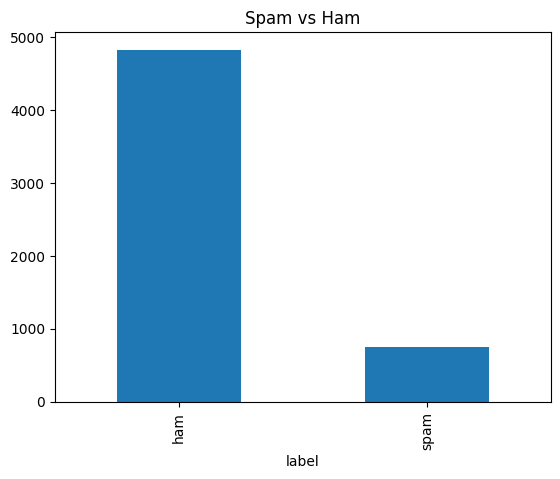

In [3]:
df.info()
df['label'].value_counts().plot(kind='bar', title='Spam vs Ham')


## 🧹 4. Preprocessing the Text

In [4]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned'] = df['message'].apply(clean_text)


## 📦 5. Vectorization

In [5]:
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned']).toarray()
y = df['label']


## 🧪 6. Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 7. Model Training

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

## 📈 8. Evaluation

In [9]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9775784753363229
[[952  13]
 [ 12 138]]
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.91      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## 📬 9. Prediction Example

In [10]:
def predict_spam(message):
    message = clean_text(message)
    vect = cv.transform([message]).toarray()
    prediction = model.predict(vect)
    if prediction[0] == 1 :
     return "Spam"
    else :
     return "Ham"

# Test
predict_spam("Congratulations! You've won a free ticket to Bahamas!")


'Ham'